In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
from livelossplot.tf_keras import PlotLossesCallback
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np

In [2]:
data=np.load('data.npy',allow_pickle=True)
labels=np.load('labels.npy',allow_pickle=True)

In [3]:
data.shape

(35887, 48, 48, 1)

In [4]:
labels.shape

(35887,)

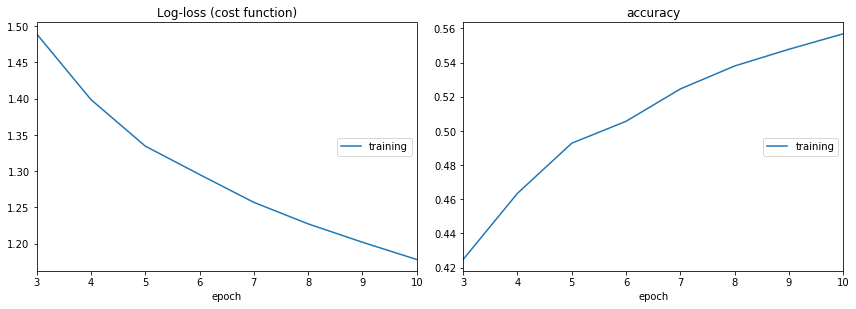

Log-loss (cost function):
training   (min:    1.178, max:    2.039, cur:    1.178)

accuracy:
training   (min:    0.235, max:    0.557, cur:    0.557)
35887/35887 [==============================] - 26s 720us/sample - loss: 1.1780 - accuracy: 0.5569


In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(48,48,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))
            
model.compile(loss='sparse_categorical_crossentropy',
                    optimizer='nadam',
                    metrics=['accuracy'])

checkpoint = ModelCheckpoint('model.h5', monitor='loss', verbose=0,
    save_best_only=True, mode='auto', period=1)

hist=model.fit(data, labels, epochs=100, batch_size=32, callbacks=[PlotLossesCallback(),checkpoint])